In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
data = pd.read_csv('C:\\Users\\fig_g\\Downloads\\customer_data.csv')
data.head()

,ID Cliente,Edad,Ingresos Anuales (k$),Puntuación de Gasto (1-100),Categoría de Producto Favorito
0,1,56,89,47,Libros
1,2,69,91,86,Hogar
2,3,46,46,23,Electrónica
3,4,32,28,66,Libros
4,5,60,81,27,Electrónica


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   ID Cliente                      200 non-null    int64 
 1   Edad                            200 non-null    int64 
 2   Ingresos Anuales (k$)           200 non-null    int64 
 3   Puntuación de Gasto (1-100)     200 non-null    int64 
 4   Categoría de Producto Favorito  200 non-null    object
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
data.describe()

,ID Cliente,Edad,Ingresos Anuales (k$),Puntuación de Gasto (1-100)
count,200.000000,200.00000,200.000000,200.000000
mean,100.500000,43.42500,69.580000,49.910000
std,57.879185,14.94191,29.693808,29.409292
min,1.000000,18.00000,20.000000,1.000000
25%,50.750000,31.00000,43.750000,24.000000
50%,100.500000,43.50000,69.500000,50.000000
75%,150.250000,56.00000,92.500000,74.000000
max,200.000000,69.00000,119.000000,99.000000


In [5]:
escalador = MinMaxScaler()
data_escala = escalador.fit_transform(data[['Edad', 'Ingresos Anuales (k$)', 'Puntuación de Gasto (1-100)']])
data_escala

array([[0.74509804, 0.6969697 , 0.46938776],
       [1.        , 0.71717172, 0.86734694],
       [0.54901961, 0.26262626, 0.2244898 ],
       [0.2745098 , 0.08080808, 0.66326531],
       [0.82352941, 0.61616162, 0.26530612],
       [0.1372549 , 0.36363636, 0.01020408],
       [0.39215686, 0.96969697, 0.90816327],
       [0.74509804, 0.50505051, 0.16326531],
       [0.35294118, 0.43434343, 0.32653061],
       [0.43137255, 0.23232323, 0.08163265],
       [0.19607843, 0.78787879, 0.42857143],
       [0.19607843, 0.58585859, 0.47959184],
       [0.45098039, 0.31313131, 0.3877551 ],
       [0.68627451, 0.95959596, 0.93877551],
       [0.76470588, 0.87878788, 0.41836735],
       [0.45098039, 0.51515152, 0.25510204],
       [0.03921569, 0.61616162, 1.        ],
       [0.41176471, 0.57575758, 0.5       ],
       [0.01960784, 0.51515152, 0.24489796],
       [0.45098039, 0.11111111, 0.23469388],
       [0.84313725, 0.38383838, 0.12244898],
       [0.56862745, 0.01010101, 0.60204082],
       [0.

In [6]:
pca = PCA(n_components=2)
pca_resultados = pca.fit_transform(data_escala)

In [7]:
U, Sigma, VT = np.linalg.svd(data_escala)

In [8]:
k = 2
svd_resultados = U[:, :k] * Sigma[:k] 

In [9]:
k_means= KMeans(n_clusters=3, random_state=42)
kmeans_clusters = k_means.fit_predict(data_escala)

C:\Users\fig_g\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [10]:
linked = linkage(data_escala, method='ward')

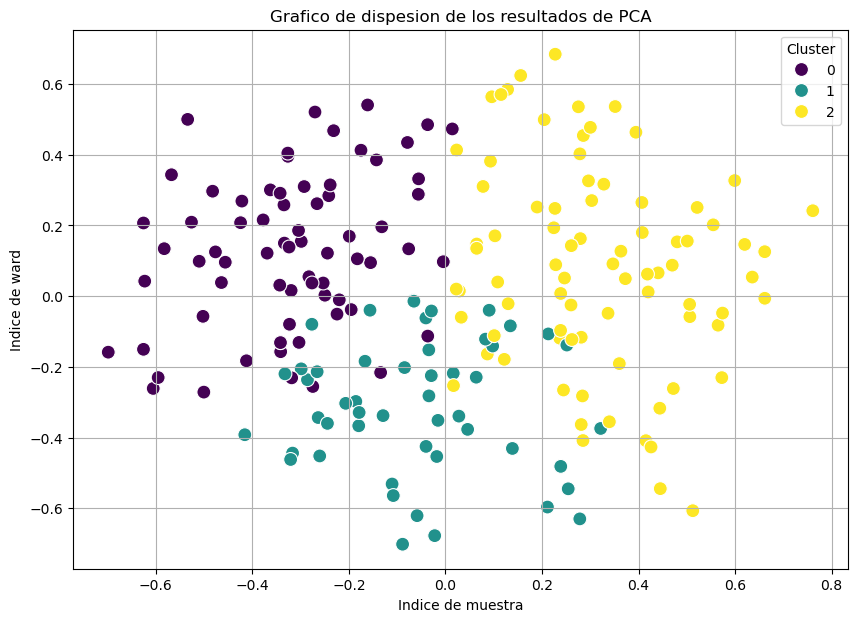

In [11]:
plt.figure(figsize=(10,7))
sns.scatterplot(x=pca_resultados[:,0], y=pca_resultados[:,1], hue=kmeans_clusters, palette='viridis', s=100)
plt.title('Grafico de dispesion de los resultados de PCA')
plt.xlabel('Indice de muestra')
plt.ylabel('Indice de ward')
plt.legend(title='Cluster')
plt.grid(True)

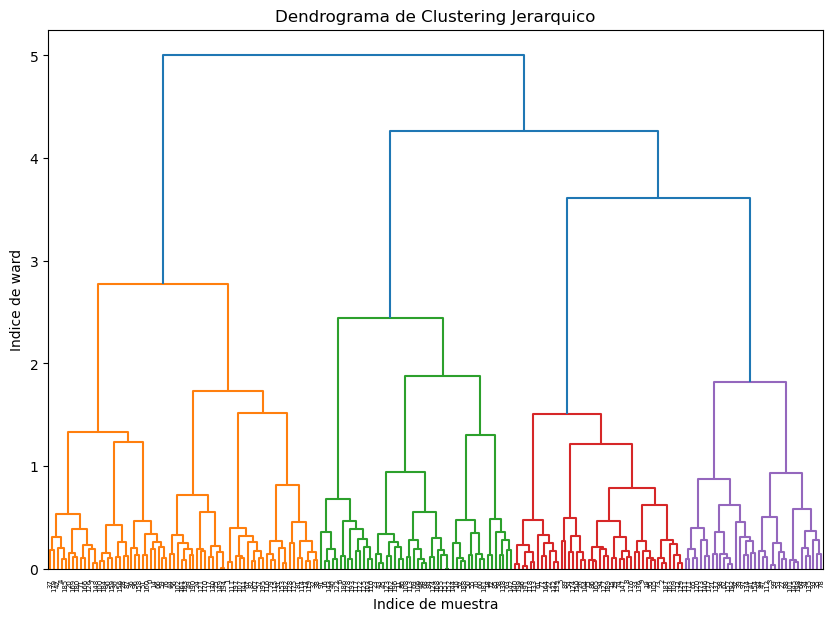

In [12]:
plt.figure(figsize=(10,7))
dendrogram(linked)
plt.title('Dendrograma de Clustering Jerarquico')
plt.xlabel('Indice de muestra')
plt.ylabel('Indice de ward')
plt.axhline(y=10, color='red', linestyle='--');

In [13]:
cluster_info = pd.DataFrame({
    'Cluster':kmeans_clusters,
    'Edad': data['Edad'],
    'Ingresos': data['Ingresos Anuales (k$)'],
    'Gasto': data['Puntuación de Gasto (1-100)']
})

In [14]:
for cluster in cluster_info['Cluster'].unique():
    cluster_data = cluster_info[cluster_info['Cluster'] == cluster]    
    print(f"Cluster {cluster}:")
    print(f"-- Edad Media: {cluster_data['Edad'].mean():.0f}")
    print(f"-- Ingresos Medios: {cluster_data['Ingresos'].mean():.2f}")
    print(f"-- Gastos Medios: {cluster_data['Gasto'].mean():.2f}")
    print()

Cluster 2:
-- Edad Media: 50
-- Ingresos Medios: 97.33
-- Gastos Medios: 62.00

Cluster 0:
-- Edad Media: 43
-- Ingresos Medios: 52.51
-- Gastos Medios: 20.17

Cluster 1:
-- Edad Media: 34
-- Ingresos Medios: 49.08
-- Gastos Medios: 72.20

